In [33]:
import pandas as pd
import json
import csv
import sys
import re
import string
import time
import numpy as np

import pandas as pd
from matplotlib.pylab import plt
from wordcloud import WordCloud

In [34]:
# load dataset
data_filepath = 'dataset/clean_dataset.json'

with open(data_filepath) as fp:
    dataset_json = json.load(fp)

In [35]:
# get x and y values
def get_x_y():
    X = []
    y = []

    for datapoint in dataset_json:
        y.append(datapoint['label'])
        X.append(datapoint['title_text'])

    return X, y


X, y = get_x_y()

## Label Distribution

In [36]:
# label Counter
counters = {}
for labels in y:
    for label in labels:
        if counters.get(label) is not None:
            counters[label] += 1
        else:
            counters[label] = 1

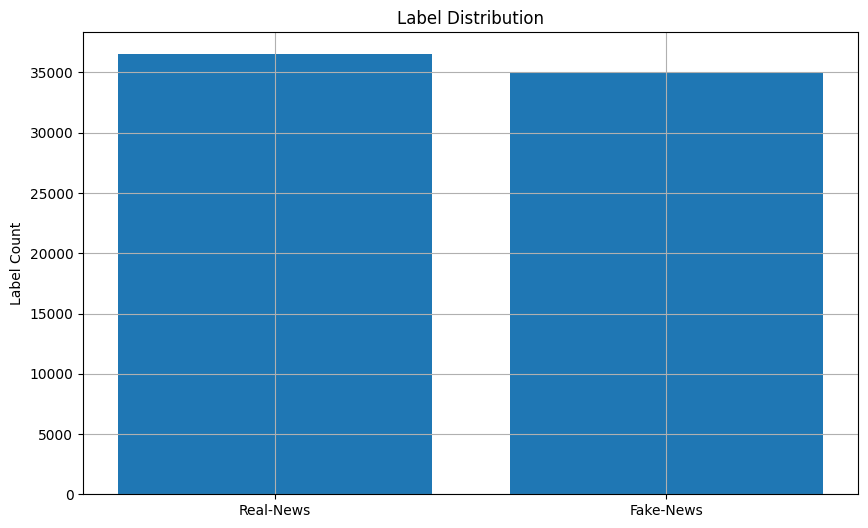

In [8]:
names = ['Real-News', 'Fake-News']
values = list(counters.values())

plt.figure(figsize=(10, 6))
plt.bar(names, values)

plt.title('Label Distribution')
plt.grid()
# plt.xlabel(f'Label Name')
plt.ylabel('Label Count')
plt.show()

## WordCloud

### WordCloud in combined text of fake and real news

In [23]:
def plot_wordcloud(text):
    news_text = " ".join(text)

    wordcloud = WordCloud(width = 1500, height = 1000, background_color = 'black').generate(news_text)
    
    fig = plt.figure(
    figsize = (20, 15),
    facecolor = 'k',
    edgecolor = 'k')

    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()


In [49]:
real_news = []
fake_news = []
for datapoint in dataset_json:
    if datapoint['label'] == '1':
        real_news.append(datapoint['title_text'])
    if datapoint['label'] == '0':
        fake_news.append(datapoint['title_text'])

### WordCloud for Real News

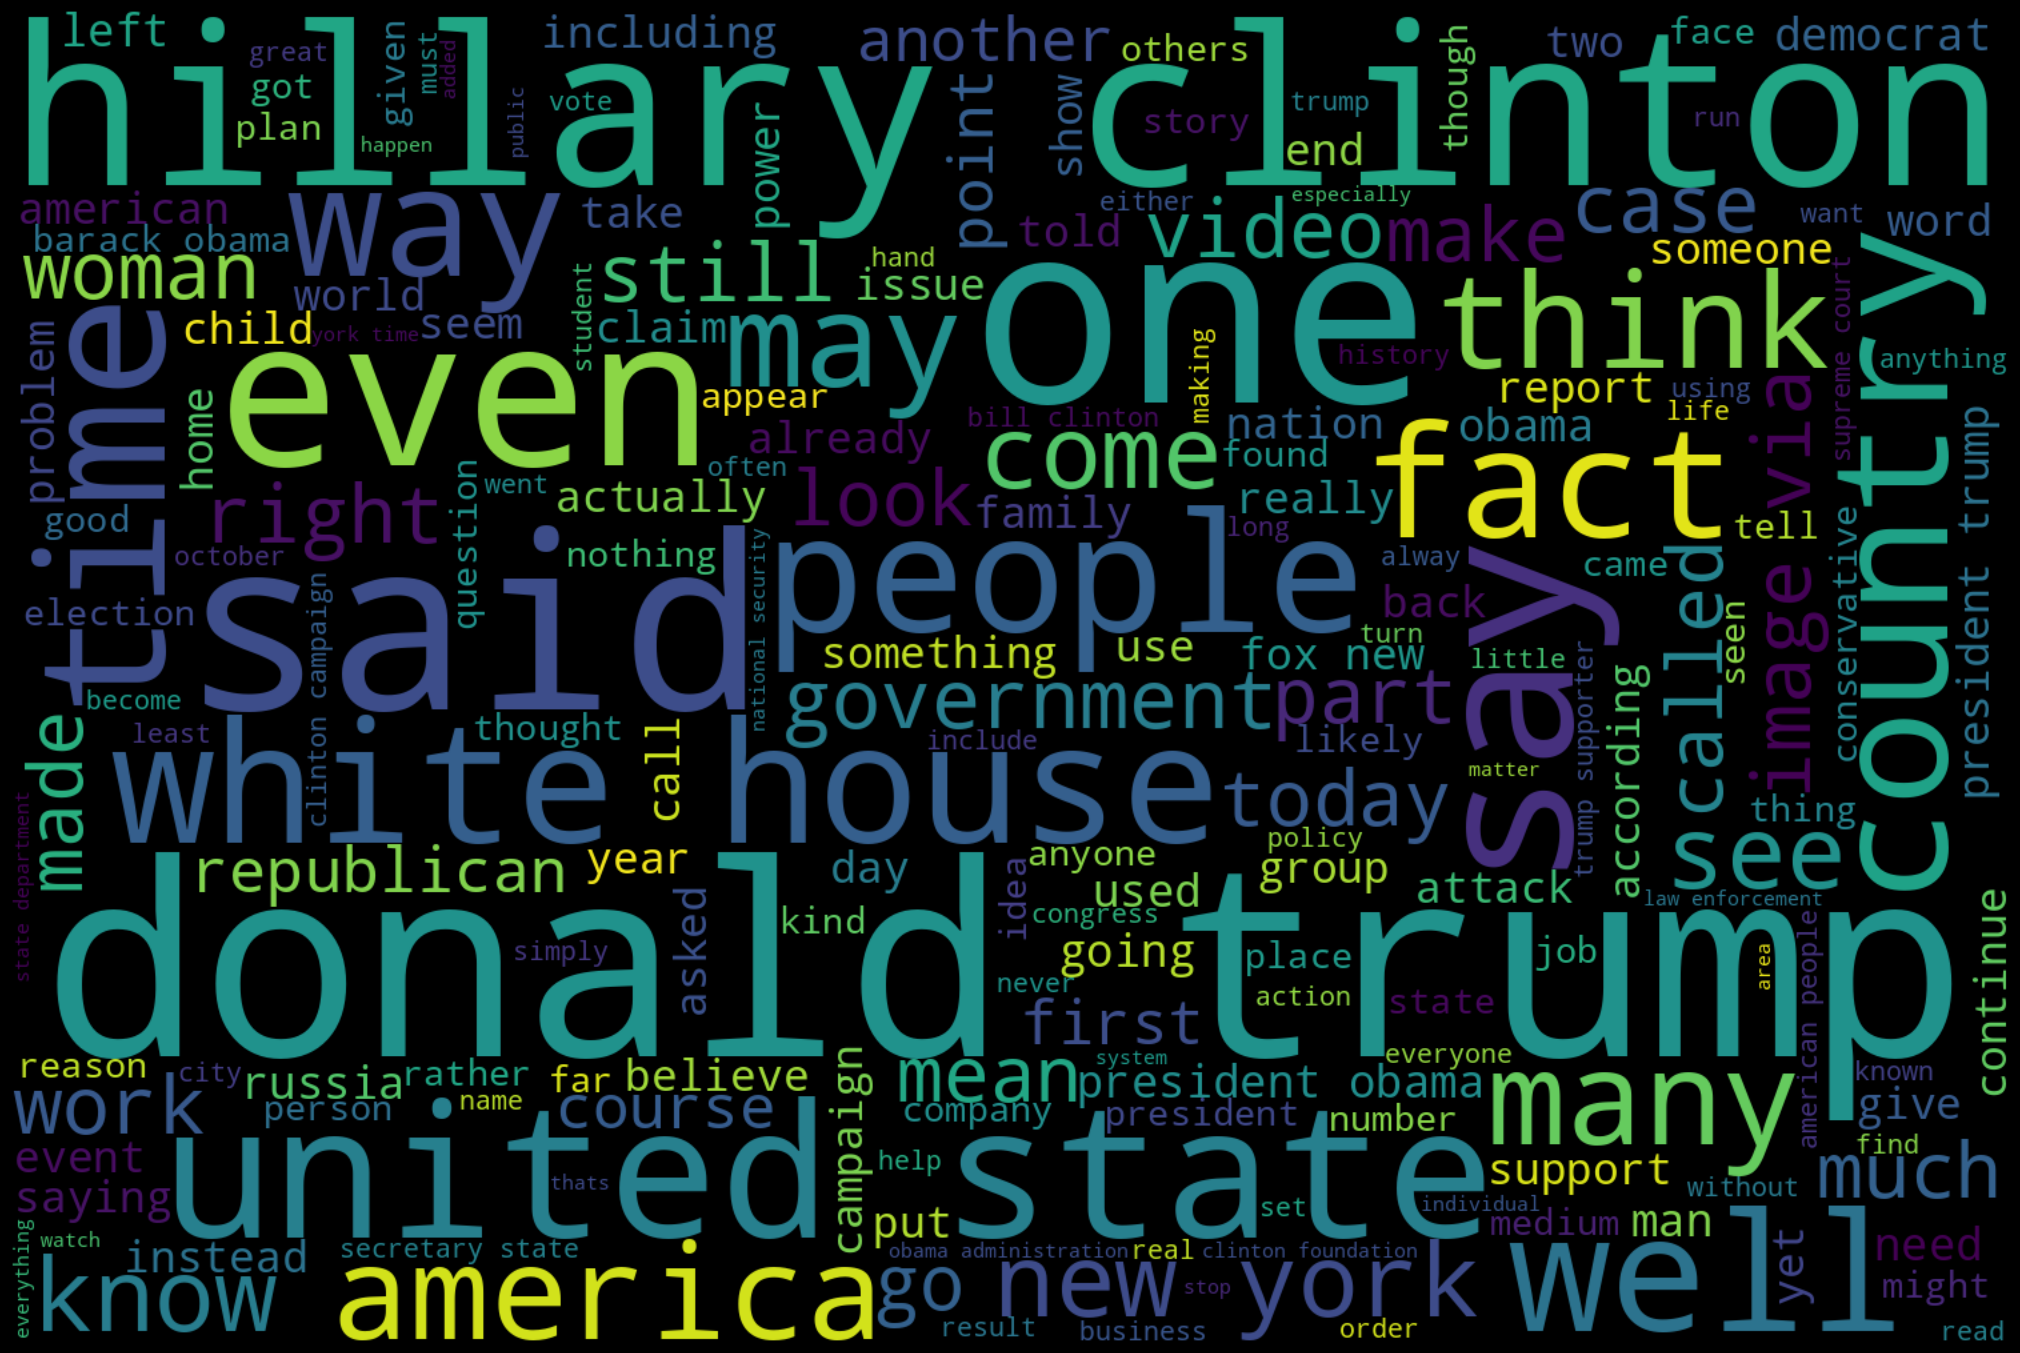

In [25]:
plot_wordcloud(real_news)

### wordcloud for Fake News

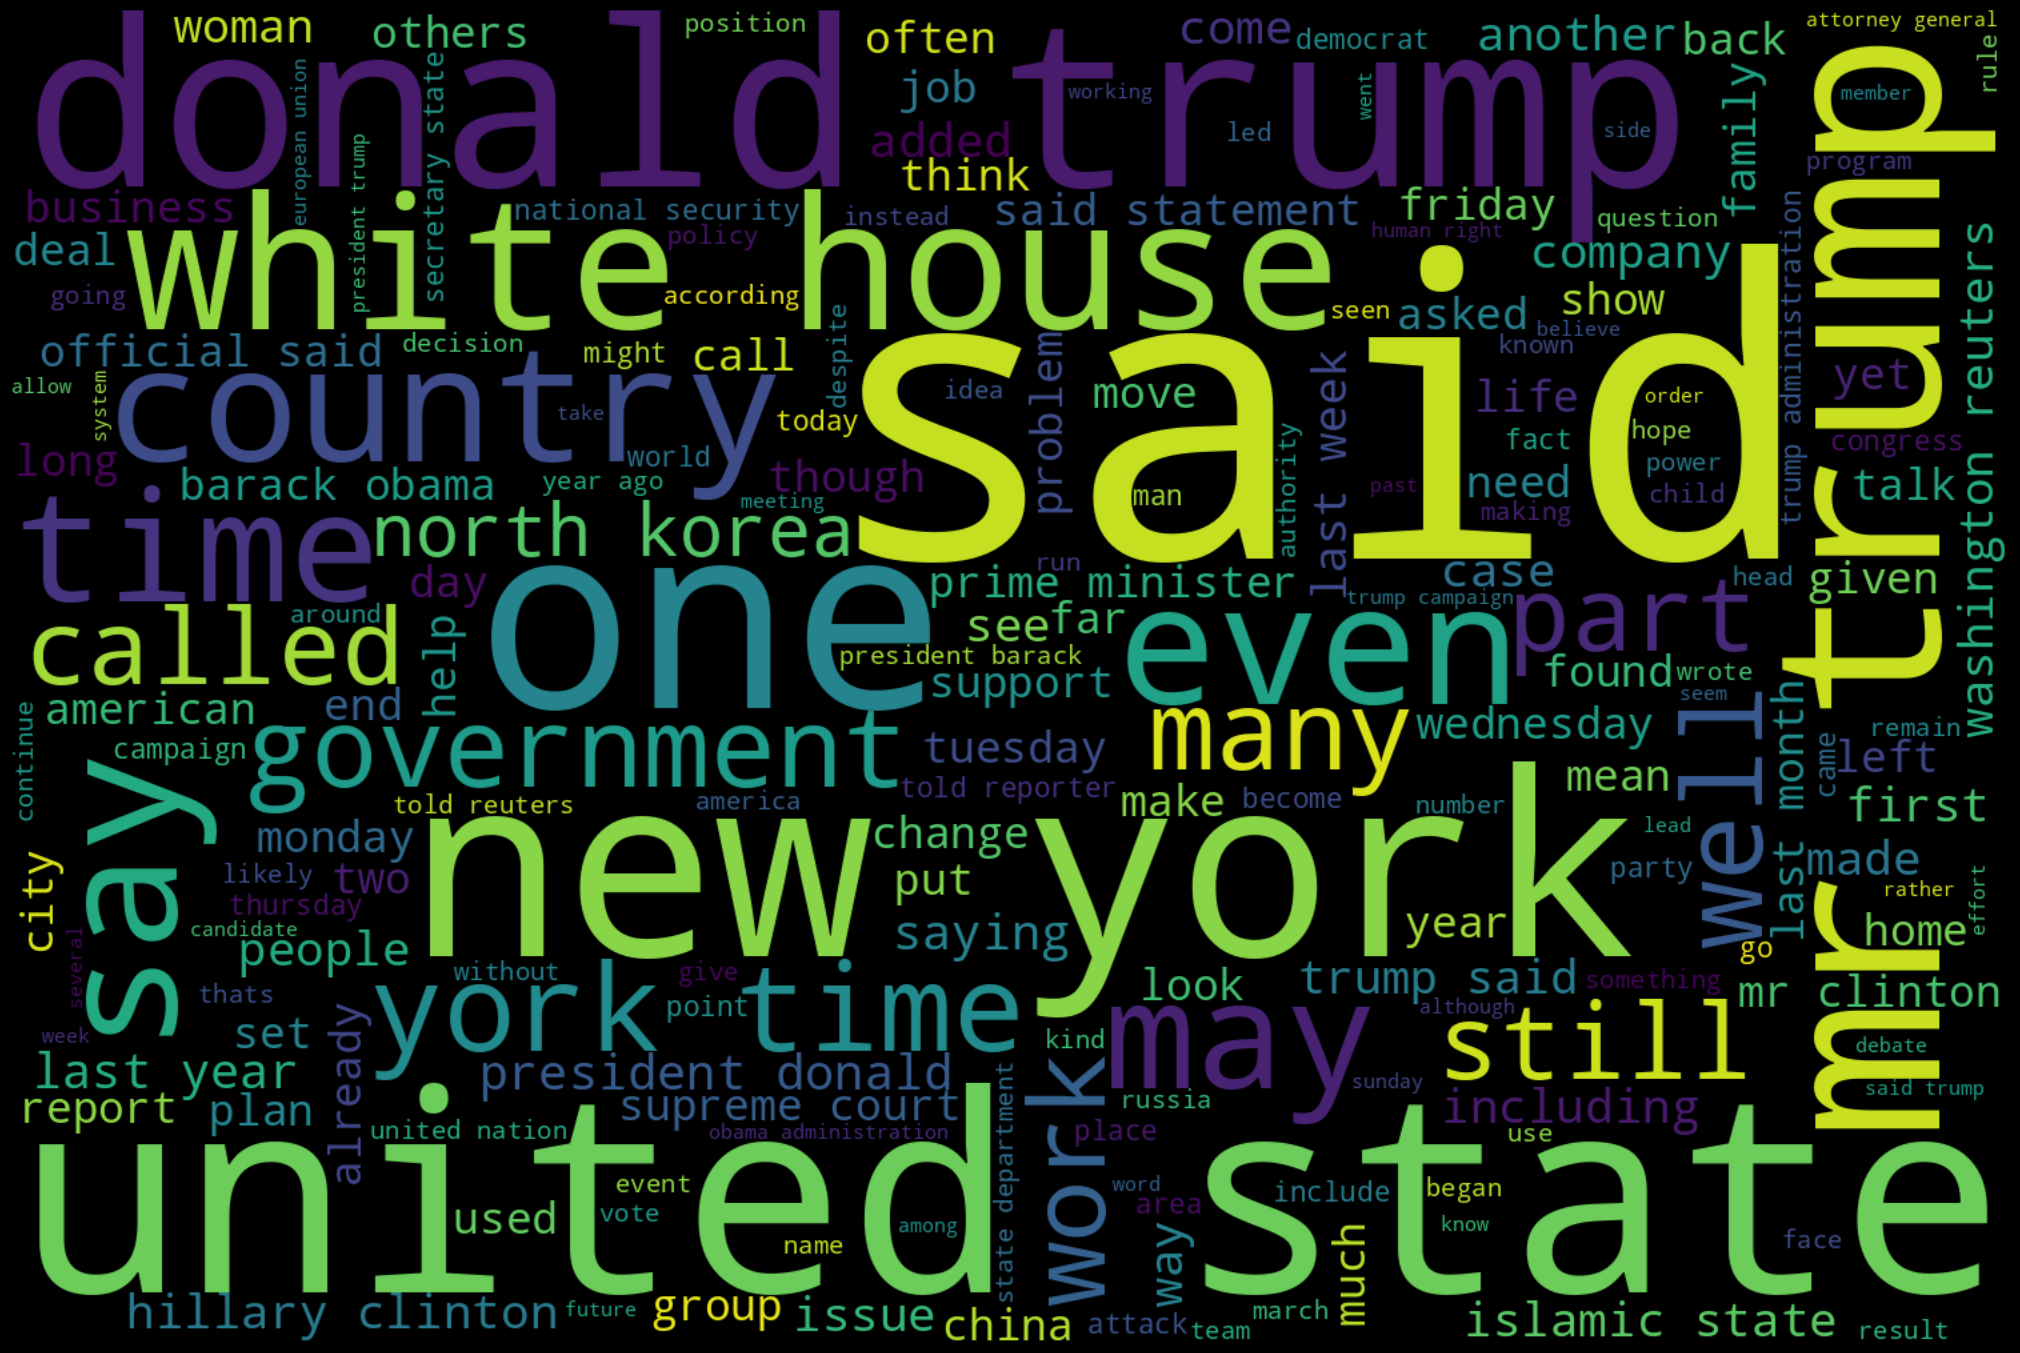

In [22]:
plot_wordcloud(fake_news)

## Distribution of words in each news articles

In [72]:
counter_words = {}

for idx, datapoint in enumerate(dataset_json):
    sentence_to_word = datapoint['title_text'].split()
    if counter_words.get(idx) is None:
        counter_words[idx] = len(sentence_to_word)    

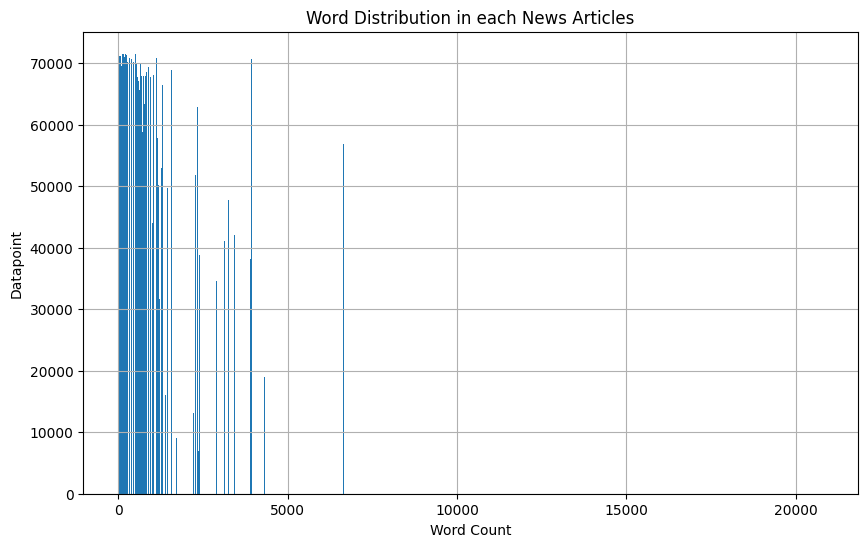

In [73]:
names = list(counter_words.keys())
values = list(counter_words.values())

plt.figure(figsize=(10, 6))
plt.bar(values, names)

plt.title('Word Distribution in each News Articles')
plt.grid()
plt.ylabel('Datapoint')
plt.xlabel('Word Count')
plt.show()

# the data is heavily skewed with. there are news articles with 20805 word length 
# they can be trunacated 
# and keeping news articles with words with 1000

In [48]:
print(f'The maximum words in a sentence is {max(values)}')
print(f'The minimum words in a sentence is {min(values)}')

The maximum words in a sentence is 20805
The minimum words in a sentence is 2


In [69]:
def word_distribution(sentence_list):
    counter_words = {}
    for idx, sentence in enumerate(sentence_list):
        sentence_to_words = sentence.split()
        if counter_words.get(idx) is None:
            counter_words[idx] = len(sentence_to_words)
    
    names = list(counter_words.keys())
    values = list(counter_words.values())

    plt.figure(figsize=(10, 6))
    plt.bar(values, names)

    plt.title(f'Word Distribution in each News Articles')
    plt.grid()
    plt.xlabel('Word Count')
    plt.show()
    
    print(f'The maximum words in a sentence is {max(values)}')
    print(f'The minimum words in a sentence is {min(values)}')

## Distribution of words in each real news articles

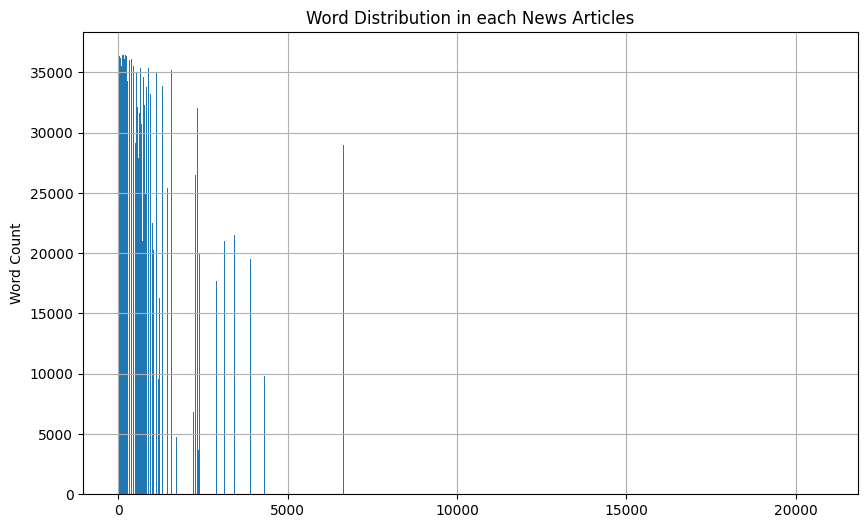

The maximum words in a sentence is 20805
The minimum words in a sentence is 2


In [70]:
word_distribution(real_news)

## Distribution of words in each fake news articles

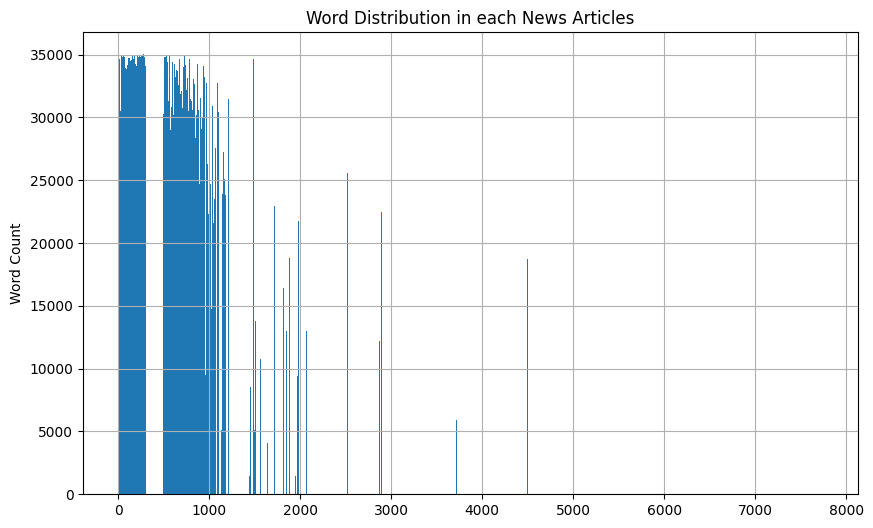

The maximum words in a sentence is 7745
The minimum words in a sentence is 4


In [74]:
word_distribution(fake_news)

In [81]:
# get the dataset and for the text with less or equal to 1000 words in article
dataset_trun = []
for datapoint in dataset_json:
    sentence_to_words = datapoint['title_text'].split()
    if len(sentence_to_words) <= 1000:
        dataset_trun.append(datapoint)

In [90]:
# check the label distribution for the trunacated data
from collections import Counter
trun_y = [dp['label'] for dp in dataset_trun]
counting = Counter(trun_y)


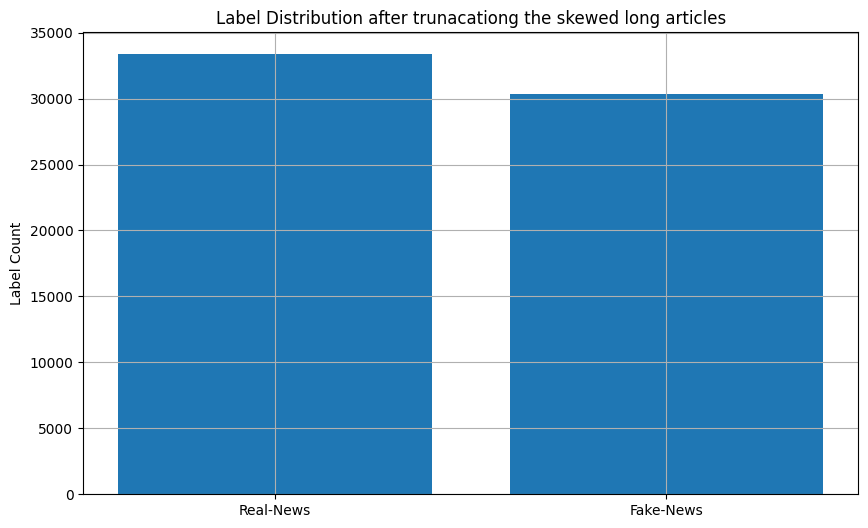

In [93]:
names = ['Real-News', 'Fake-News']
values = list(counting.values())

plt.figure(figsize=(10, 6))
plt.bar(names, values)

plt.title('Label Distribution after trunacationg the skewed long articles')
plt.grid()
# plt.xlabel(f'Label Name')
plt.ylabel('Label Count')
plt.show()